# Trying to reproduce Figure 1E

In [1]:
from biom import load_table
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt

%matplotlib inline

/Users/antoniog/.virtualenvs/qiita-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.513720652865238 and the largest is 63.563217229864286.
  RuntimeWarning


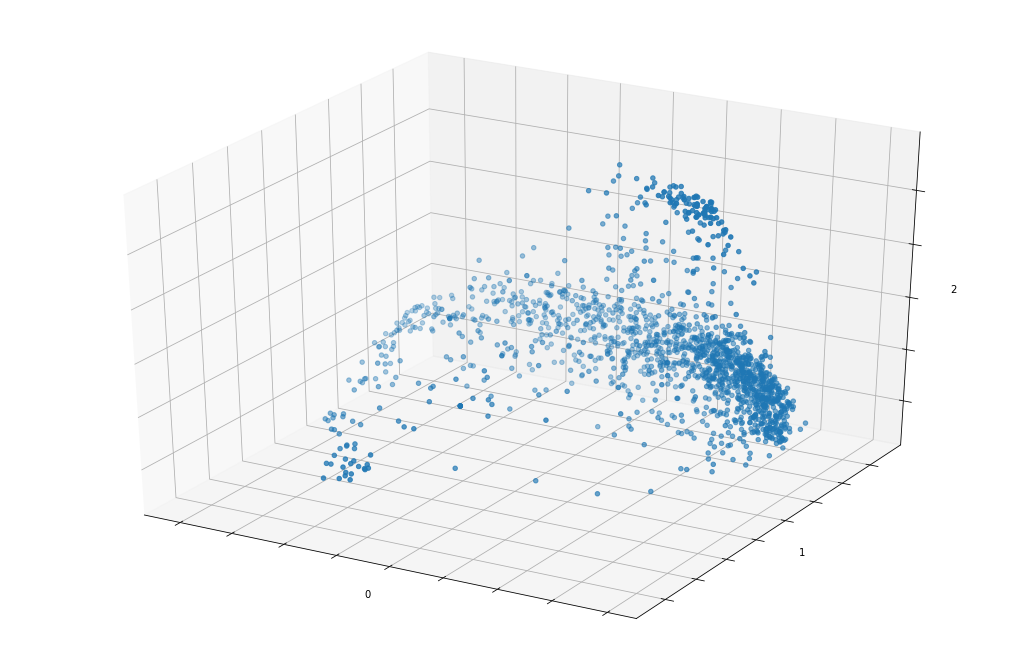

In [2]:
# Downloading WGS data
!curl -s -o taxonomic_profiles.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/WGS/1750/taxonomic_profiles.tsv.gz
!biom convert -i taxonomic_profiles.tsv.gz -o taxonomic_profiles.biom \
    --table-type="OTU table" --to-hdf5

# loading data
bf = load_table('taxonomic_profiles.biom')
ids = bf.ids()
data = [bf.data(_id, axis='sample') for _id in ids]

# distance and pcoa
bc_dm = beta_diversity("braycurtis", data, ids, validate=False)
bc_pc = pcoa(bc_dm)

# plotting
f = bc_pc.plot()
f.set_size_inches(15, 10)

In [3]:
# Downloading MTX data
!curl -s -o genefamilies.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/genefamilies.tsv.gz
!ls -lah genefamilies.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 10 15:16 genefamilies.tsv.gz


In [4]:
# Let's try another one
!curl -s -o ecs.tsv.gz \
    https://ibdmdb.org/tunnel/cb/document/Public/HMP2/MTX/1730/ecs.tsv.gz
!ls -lah ecs.tsv.gz

-rw-r--r--  1 antoniog  staff     0B Jan 10 15:16 ecs.tsv.gz
